# FAIRe Qualitäts-KPIs
Autor: Vincent Jestädt 
Datum:30.10.23

## Forschungsfrage
Formulieren Sie eine oder mehrere Forschungsfragen zu der Lerneinheit:

Inwieweit kann man mit möglichst geringen Änderungen des Fahrzeugs die KPI's verbessern?

## Erstes Fahrzeug


### Versuchsziel
Formulieren Sie ein Versuchsziel für diesen ersten Versuch:

-das erste Auto erfolgreich zu instaziieren

-KPI erfolgreich zu berechnen

### Versuchsaufbau

Bauen Sie ein erstes Fahrzeug aus den gegebenen LEGO-Teilen in der CAD-Software LeoCAD auf.

Hierbei gelten die folgenden Rahmenbedingungen:
- Das Fahrzeug muss aus Baugruppen, Bauteilen und Komponenten bestehen.
- Es muss mindestens vier Räder besitzen
- Es muss sich durch den elektrischen Antrieb fortbewegen können. 
- Die Verwendung eines Getriebes zwischen Motor und Antriebsachse(n) ist verpflichtend. 
- Die Farbe von mindestens einem Teil soll sich von der in LeoCAD hinterlegten Standardfarbe unterscheiden.
- Es sind nur die LEGO-Teile zu verwenden, welche sich in den JSON-Dateien bzw. in
der zur Verfügung gestellten Teilebibliothek befinden.

Fügen Sie eine Abbildung des fertigen Autos in LeoCAD hinzu (*Hinweise: Ein Bild lässt sich mit \!\[Bildbeschreibung](/Pfad/zum/Bild) hinzufügen. Achten Sie darauf, das Bild später auch in Git hinzuzufügen*):


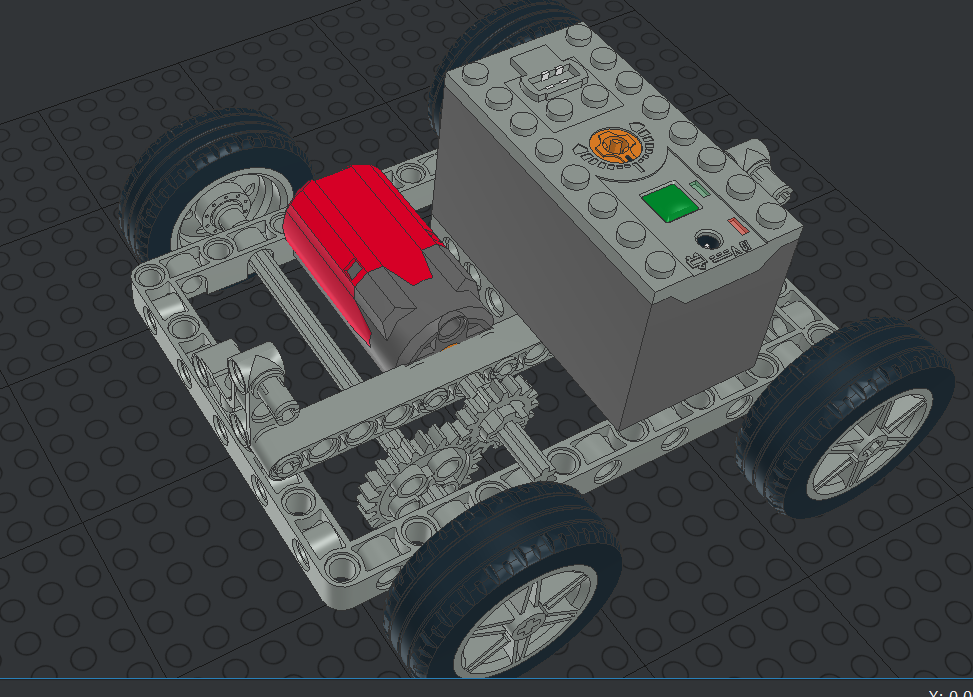

Beschreiben Sie kurz und präzise Ihr Fahrzeug:

Das Fahrzeug besteht aus 4 mittelgroßen Reifen, die über eine Hinter- und Vorderachse mit einem großen Rahmen verbunden werden. Die Achsen werden dabei durch Buchsen in Position gehalten. Motor und Batterie sitzen auf einem Querträger, der längs auf den Hauptrahmen befestigt ist. Zwischen Motor (Farbe rot) und Vorderachse liegt eine Übersetzungsstufe. 

Bauen Sie das Fahrzeug nun in unserem Software-Framework zusammen. Instanziieren Sie die LEGO-Teile und lesen Sie dabei auch die Eigenschaften ein. Ergänzen Sie zusätzliche Eigenschaften, wie z.B. die Farbe. Referenzieren Sie die Teile aufeinander und erstellen Sie auf diese Weise sinnvolle Bauteile, Baugruppen und das
Gesamtsystem. Nutzen Sie die hierfür bereitgestellten Klassendefinitionen und Methoden. Achten Sie auf eine gute Code-Dokumentation. Sie können sich für die Bearbeitung an den zur Verfügung gestellten Code-Zellen orientieren, können hiervon jedoch auch abweichen.

*Hinweise: Achten Sie auf die Unterschiede zum Minimalbeispiel. Eine direkte Kopie ist nicht möglich. Achten Sie außerdem darauf, ein Teil (eindeutig identifiziert durch seine UUID) nicht an mehreren Stellen zu verbauen*

In [1]:
#Import der notwendigen Dateien und Funktionen
import json
import pprint
from functions import calculation_rules
from functions.classes import *
from functions.classes import LegoComponent
from functions.classes import LegoAssembly
from functions.classes import AggregationLayer
from functions.classes import KPIEncoder
from functions.classes import print_assembly_tree


In [2]:
#Laden der einzelnen Bereiche der bereitgestellten Teileliste und entsprechende Namensvergabe für die spätere Verwendung
with open("datasheets/frame.json") as json_file:
    frame = json.load(json_file)
with open("datasheets/wheels.json") as json_file:
    wheels = json.load(json_file)    
with open("datasheets/axles.json") as json_file:
    axles = json.load(json_file)    
with open("datasheets/motors.json") as json_file:
    motors = json.load(json_file)    
with open("datasheets/gears.json") as json_file:
    gears = json.load(json_file)    
with open("datasheets/batteries.json") as json_file:
    batteries = json.load(json_file)    
#Laden&Namensvergabe des Haupt - und Batterierahmens 
main_frame = LegoComponent("main frame", frame["39790"])
battery_frame = LegoComponent("battery frame", frame["32531"])
#Laden&Namensvergabe der einzelnen Verbindungs-Stifte
pin_connector_front = LegoComponent("pin connector front", frame["55615"])
pin_connector_back = LegoComponent("pin connector back", frame["55615"])
pin_battery_frame_front = LegoComponent("pin battery frame front", frame["3673"])
pin_battery_frame_back = LegoComponent("pin battery frame back", frame["3673"])
pin_motor_support_front = LegoComponent("pin motor support front", frame["3673"])
pin_motor_support_back = LegoComponent("pin motor support back", frame["3673"])
#Laden&Namensvergabe des Querträgers
beam_long = LegoComponent("beam long", frame["32278"])
#Laden&Namensvergabe der 4 Achs-Buchsen
bush_front_left = LegoComponent("bush front left", frame["3713"])
bush_front_right = LegoComponent("bush front right", frame["3713"])
bush_back_left = LegoComponent("bush back left", frame["3713"])
bush_back_right = LegoComponent("bush back right", frame["3713"])
#Laden&Namensvergabe der einzelnen Reifen
front_wheel_left = LegoComponent("front wheel left", wheels["56904c02"])
front_wheel_right = LegoComponent("front wheel right", wheels["56904c02"])
back_wheel_left = LegoComponent("back wheel left", wheels["56904c02"])
back_wheel_right = LegoComponent("back wheel right", wheels["56904c02"])
#Laden&Namensvergabe der Fahrwerks- und Getriebeachsen
long_axle_front = LegoComponent("long axle front", axles["50451"])
long_axle_back = LegoComponent("long axle back", axles["50451"])
short_axle = LegoComponent("short axle", axles["32073"])
#Laden&Namensvergabe des Motors
motor = LegoComponent("motor", motors["8883-1"])
#ändern der Motorfarbe
motor.properties["color"] = "metallic bright red"
#Laden&Namensvergabe der Batterie
battery = LegoComponent("motor", batteries["8878-1"])
#Laden&Namensvergabe der Getriebezahnräder
small_gear = LegoComponent("small gear", gears["94925"])
big_gear = LegoComponent("big gear", gears["3648"])

In [3]:
#Erstellen des Struktur-Baumes
#Bildung der Unterbaugruppe Vorderrad-links
front_wheel_left_assembly = LegoAssembly(
    AggregationLayer.SUBASSEMBLY,
    "front wheel left assembly",
    assembly_method="stick together like lego blocks",)
front_wheel_left_assembly.add([front_wheel_left, bush_front_left])
#Bildung der Unterbaugruppe Vorderrad-rechts
front_wheel_right_assembly = LegoAssembly(
    AggregationLayer.SUBASSEMBLY, "front wheel right assembly"
    )
front_wheel_right_assembly.add([front_wheel_left, bush_front_right])
#Bildung der Unterbaugruppe Vorderachse
front_axle_assembly = LegoAssembly(
    AggregationLayer.SUBASSEMBLY, "front axle assembly"
    )
front_axle_assembly.add([front_wheel_left_assembly, front_wheel_right_assembly, long_axle_front])

#Bildung der Unterbaugruppe Hinterrad-rechts
back_wheel_right_assembly = LegoAssembly(
    AggregationLayer.SUBASSEMBLY, "back wheel right assembly"
    )
back_wheel_right_assembly.add([back_wheel_right, bush_back_right])
#Bildung der Unterbaugruppe Hinterrad-links
back_wheel_left_assembly = LegoAssembly(
    AggregationLayer.SUBASSEMBLY, "back wheel left assembly"
    )
back_wheel_left_assembly.add([back_wheel_left, bush_back_left])
#Bildung der Unterbaugruppe Hinterachse
back_axle_assembly = LegoAssembly(
    AggregationLayer.SUBASSEMBLY, "back axle assembly"
    )
back_axle_assembly.add([back_wheel_left_assembly, back_wheel_right_assembly, long_axle_back])
#Bildung der Baugruppe Fahrwerk
undercarriage_assembly = LegoAssembly(
    AggregationLayer.SUBASSEMBLY, "undercarriage assembly"
    )
undercarriage_assembly.add([front_axle_assembly, back_axle_assembly, main_frame])
#Bildung der Unterbaugruppe Motor
motor_assembly = LegoAssembly(
    AggregationLayer.SUBASSEMBLY, "motor assembly"
    )
motor_assembly.add([motor, short_axle, pin_motor_support_front, pin_motor_support_back])
#Bildung der Unterbaugruppe Getriebe
gear_assembly = LegoAssembly(
    AggregationLayer.SUBASSEMBLY, "gear assembly"
    )
gear_assembly.add([small_gear, big_gear])
#Bildung der Baugruppe Antriebsstrang
drive_assembly = LegoAssembly(
    AggregationLayer.SUBASSEMBLY, "drive assembly"
    )
drive_assembly.add([motor_assembly, gear_assembly])
#Bildung der Unterbaugruppe Batterie-Rahmens
battery_frame_assembly = LegoAssembly(
    AggregationLayer.SUBASSEMBLY, "battery frame assembly"
    )
battery_frame_assembly.add([battery_frame, pin_battery_frame_front, pin_battery_frame_back])
#Bildung der Baugruppe Batterie
battery_assembly = LegoAssembly(
    AggregationLayer.SUBASSEMBLY, "battery assembly"
    )
battery_assembly.add([battery_frame_assembly, battery])
#Bildung der Unterbaugruppe Querträger
support_frame_assembly = LegoAssembly(
    AggregationLayer.SUBASSEMBLY, "support frame assembly"
    )
support_frame_assembly.add([pin_connector_front, pin_connector_back, beam_long])
#Bildung der Baugruppe Aufbau
inner_structure_assembly = LegoAssembly(
    AggregationLayer.SUBASSEMBLY, "inner structure assembly"
    )
inner_structure_assembly.add([support_frame_assembly, battery_assembly, drive_assembly])
#Bildung des Systems Lego Auto 1
lego_car = LegoAssembly(
    AggregationLayer.SUBASSEMBLY, "lego car",
    manufacturer="Vincent Jestaedt",
    comment="Faster! Harder! Lego!"
    )
lego_car.add([inner_structure_assembly, undercarriage_assembly])

In [4]:
#Ausgabe des vollständigen Struktur-Baumes
print_assembly_tree(lego_car)


LegoAssembly lego car [df764d45-c427-4b52-aa96-9184f72e0024]
├── LegoAssembly inner structure assembly [d8836aef-ed27-42a0-a3c4-6e309353cc74]
│   ├── LegoAssembly support frame assembly [7fe6ae11-ef95-4b95-bdde-9890cc0c8b07]
│   │   ├── LegoComponent pin connector front [2730a2d2-5c44-4799-8779-13be31d877a0]
│   │   ├── LegoComponent pin connector back [dbb806f1-53e5-480a-897b-e903e01b2ee0]
│   │   └── LegoComponent beam long [4db4341f-b702-4275-a422-8b8384b9c057]
│   ├── LegoAssembly battery assembly [22ded891-f8ea-455b-8370-5493185b63c2]
│   │   ├── LegoAssembly battery frame assembly [7d739674-7904-43cf-8fcd-663b21189890]
│   │   │   ├── LegoComponent battery frame [8b03a798-fd74-4750-9036-6747df83fcc4]
│   │   │   ├── LegoComponent pin battery frame front [13938a1b-2cae-45b2-97e0-34fe7d28281e]
│   │   │   └── LegoComponent pin battery frame back [b0acd16b-f9f5-43e2-b56a-ec7a5a9f9565]
│   │   └── LegoComponent motor [69894c56-0d8e-433b-962c-b8e346861dbe]
│   └── LegoAssembly drive a

### Analyse
Bestimmen Sie die Qualität Ihres Fahrzeugs mittels KPIs.
Die Qualität des Fahrzeugs ist mit mindestens einem KPI je Qualitätsdimension (Aufwand, Verfügbarkeit, Akzeptanz) zu bestimmen. Enwickeln Sie zunächst sinnvolle KPIs, welche mit den gegebenen Daten umsetzbar sind. Halten Sie die Berechnungsvorschriften im Jupyter Notebook fest. Implementieren Sie deren Berechnung für das Gesamtsystem "Fahrzeug" mittels einzelner Funktionen im Skript `calculation_rules`. Sie können zusätzlich Ihre Methoden auch auf die niedrigeren Aggregationsebenen anwenden.

Beschreiben Sie den jeweiligen KPI und geben Sie seine Berechnungsvorschrift an:

$$
a = \frac{b}{c} + d
$$

KPIs: -Gesamtmasse des Systems (Berechnung: Aufsummieren aller Einzelgewichte)
      
      -Gesamtpreis des Systems (Berechnung: Aufsummieren aller Einzelpreise)
      
      -Auswertung der maximalen Lieferzeit aller Bauteile (Berechnung: Durchsuchen aller verwendeten datasheets nach der                längsten Lieferzeit )


Halten Sie die berechneten Werte für die KPIs im Notebook
fest:

In [5]:
# Berechnung der KPIs durch die zuvor bestimmten Funktionen in den calculation_rules
# Berechnung der Gesamtmasse
total_mass_one = calculation_rules.kpi_mass(lego_car)
# Berechnung des Gesatpreises
total_price_one = calculation_rules.kpi_price(lego_car)
# Berechnung der max. Lieferzeit
max_delivery_time_one = calculation_rules.kpi_delivery_time(lego_car)



In [6]:
#Ausgabe und Implimentierung der Daten in die Datasheets des ersten Autos
print("Gesamtmasse: ", total_mass_one, "g")
lego_car.properties["mass [g]"] = total_mass_one
print("Gesamtpreis: ", total_price_one, "Euro")
lego_car.properties["price [Euro]"] = total_price_one
print("max. Lieferzeit: ", max_delivery_time_one, "days")
lego_car.properties["delivery time [days]"] = max_delivery_time_one

Gesamtmasse:  205.16999999999993 g
Gesamtpreis:  80.08100000000003 Euro
max. Lieferzeit:  12 days


Exportieren Sie schließlich Ihr entworfenes Fahrzeug inklusive der entwickelten KPIs:

In [7]:
# Exportieren des ersten Autos
with open("lego_car.json", "w") as fp:
    json.dump(lego_car.to_dict(), fp, cls=KPIEncoder, indent=4)

## Zweites Fahrzeug

### Versuchsziel

Setzen Sie sich ein Ziel, welche Qualitätsdimensionen in einem zweiten Fahrzeug verbessert werden sollen und bauen
Sie darauf aufbauend ein zweites Fahrzeug aus den gegebenen LEGO-Teilen auf.
Die Anforderungen an das Fahrzeug sind identisch zum ersten. Wählen Sie die Einzelteile und deren Zusammenspiel entsprechend Ihrer Zielstellung aus.

Formulieren Sie ein Versuchsziel für diesen Versuch. Beschreiben Sie unter anderem, welche Verbesserung Sie vornehmen möchten:

Ziel: -das Fahrzeug leichter zu konstruieren 
      
      -eventuell dadurch auch eine Kostenersparnis zu realisieren 
      
Verbesserungen: -hintere Reifen 
                
                -Batterie (eventuell) 
                
                -hintere Achse 

### Versuchsaufbau

Fügen Sie eine Abbildung des fertigen Autos in LeoCAD hinzu:

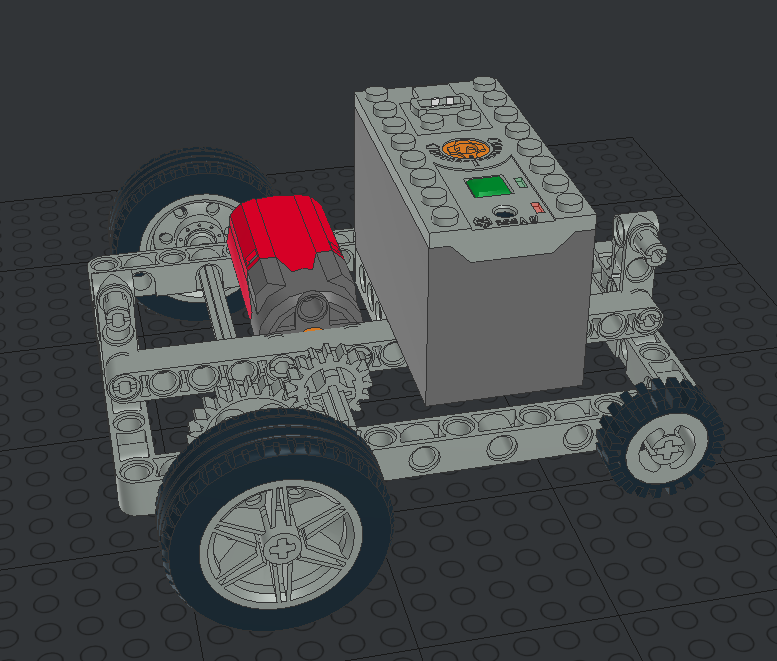

Beschreiben Sie kurz und präzise den Aufbau des zweiten Fahrzeugs:

Änderungen zum ersten Fahrzeug:
-hintere Achse mit den beiden Buchsen wurde durch zwei 'technic axle pin' ausgetauscht

-hinteren beiden Reifen wurde durch kleinere ausgetauscht

-die vorderen Reifen wollte ich tauschen, doch dann schleift das große Zahnrad auf dem Boden. Dies würde größere Änderungen benötigen, was meiner Forschungsfrage nicht entspricht.

Der Rest des Fahrzeugs ist gleich geblieben.

Erstellen Sie das Fahrzeug in unserem Softwareframework:

In [16]:
#Laden der einzelnen Bereiche der bereitgestellten Teileliste und entsprechende Namensvergabe für die spätere Verwendung
with open("datasheets/frame.json") as json_file:
    frame = json.load(json_file)
with open("datasheets/wheels.json") as json_file:
    wheels = json.load(json_file)    
with open("datasheets/axles.json") as json_file:
    axles = json.load(json_file)    
with open("datasheets/motors.json") as json_file:
    motors = json.load(json_file)    
with open("datasheets/gears.json") as json_file:
    gears = json.load(json_file)    
with open("datasheets/batteries.json") as json_file:
    batteries = json.load(json_file)    
#Laden&Namensvergabe des Haupt - und Batterierahmens 
main_frame = LegoComponent("main frame", frame["39790"])
battery_frame = LegoComponent("battery frame", frame["32531"])
#Laden&Namensvergabe der einzelnen Verbindungs-Stifte
pin_connector_front = LegoComponent("pin connector front", frame["55615"])
pin_connector_back = LegoComponent("pin connector back", frame["55615"])
pin_battery_frame_front = LegoComponent("pin battery frame front", frame["3673"])
pin_battery_frame_back = LegoComponent("pin battery frame back", frame["3673"])
pin_motor_support_front = LegoComponent("pin motor support front", frame["3673"])
pin_motor_support_back = LegoComponent("pin motor support back", frame["3673"])
#Laden&Namensvergabe des Querträgers
beam_long = LegoComponent("beam long", frame["32278"])
#Laden&Namensvergabe der 2 vorderen Achs-Buchsen
bush_front_left = LegoComponent("bush front left", frame["3713"])
bush_front_right = LegoComponent("bush front right", frame["3713"])
#Laden&Namensvergabe der neuen Achs-Stifte
axle_pin_right = LegoComponent("axle pin right", frame["3749"])
axle_pin_left = LegoComponent("axle pin left", frame["3749"])
#Laden&Namensvergabe der vorderen Reifen
front_wheel_left = LegoComponent("front wheel left", wheels["56904c02"])
front_wheel_right = LegoComponent("front wheel right", wheels["56904c02"])
#Laden&Namensvergabe der neuen Hinterreifen
back_wheel_left = LegoComponent("back wheel left", wheels["3482c01"])
back_wheel_right = LegoComponent("back wheel right", wheels["3482c01"])
#Laden&Namensvergabe der Fahrwerks- und Getriebeachsen
long_axle_front = LegoComponent("long axle front", axles["50451"])
short_axle = LegoComponent("short axle", axles["32073"])
#Laden&Namensvergabe des Motors
motor = LegoComponent("motor", motors["8883-1"])
#ändern der Motorfarbe
motor.properties["color"] = "metallic bright red"
#Laden&Namensvergabe der Batterie
battery = LegoComponent("motor", batteries["8878-1"])
#Laden&Namensvergabe der Getriebezahnräder
small_gear = LegoComponent("small gear", gears["94925"])
big_gear = LegoComponent("big gear", gears["3648"])

In [17]:
#Erstellen des Struktur-Baumes
#Bildung der Unterbaugruppe Vorderrad-links
front_wheel_left_assembly = LegoAssembly(
    AggregationLayer.SUBASSEMBLY,
    "front wheel left assembly",
    assembly_method="stick together like lego blocks",)
front_wheel_left_assembly.add([front_wheel_left, bush_front_left])
#Bildung der Unterbaugruppe Vorderrad-rechts
front_wheel_right_assembly = LegoAssembly(
    AggregationLayer.SUBASSEMBLY, "front wheel right assembly"
    )
front_wheel_right_assembly.add([front_wheel_left, bush_front_right])
#Bildung der Unterbaugruppe Vorderachse
front_axle_assembly = LegoAssembly(
    AggregationLayer.SUBASSEMBLY, "front axle assembly"
    )
front_axle_assembly.add([front_wheel_left_assembly, front_wheel_right_assembly, long_axle_front])
#Bildung der Unterbaugruppe Hinterrad-rechts
back_wheel_right_assembly = LegoAssembly(
    AggregationLayer.SUBASSEMBLY, "back wheel right assembly"
    )
back_wheel_right_assembly.add([back_wheel_right, axle_pin_right])
#Bildung der Unterbaugruppe Hinterrad-links
back_wheel_left_assembly = LegoAssembly(
    AggregationLayer.SUBASSEMBLY, "back wheel left assembly"
    )
back_wheel_left_assembly.add([back_wheel_left, axle_pin_left])
#Bildung der Baugruppe Fahrwerk
undercarriage_assembly = LegoAssembly(
    AggregationLayer.SUBASSEMBLY, "undercarriage assembly"
    )
undercarriage_assembly.add([front_axle_assembly, back_wheel_right_assembly, back_wheel_left_assembly, main_frame])
#Bildung der Unterbaugruppe Motor
motor_assembly = LegoAssembly(
    AggregationLayer.SUBASSEMBLY, "motor assembly"
    )
motor_assembly.add([motor, short_axle, pin_motor_support_front, pin_motor_support_back])
#Bildung der Unterbaugruppe Getriebe
gear_assembly = LegoAssembly(
    AggregationLayer.SUBASSEMBLY, "gear assembly"
    )
gear_assembly.add([small_gear, big_gear])
#Bildung der Baugruppe Antriebsstrang
drive_assembly = LegoAssembly(
    AggregationLayer.SUBASSEMBLY, "drive assembly"
    )
drive_assembly.add([motor_assembly, gear_assembly])
#Bildung der Unterbaugruppe Batterie-Rahmens
battery_frame_assembly = LegoAssembly(
    AggregationLayer.SUBASSEMBLY, "battery frame assembly"
    )
battery_frame_assembly.add([battery_frame, pin_battery_frame_front, pin_battery_frame_back])
#Bildung der Baugruppe Batterie
battery_assembly = LegoAssembly(
    AggregationLayer.SUBASSEMBLY, "battery assembly"
    )
battery_assembly.add([battery_frame_assembly, battery])
#Bildung der Unterbaugruppe Querträger
support_frame_assembly = LegoAssembly(
    AggregationLayer.SUBASSEMBLY, "support frame assembly"
    )
support_frame_assembly.add([pin_connector_front, pin_connector_back, beam_long])
#Bildung der Baugruppe Aufbau
inner_structure_assembly = LegoAssembly(
    AggregationLayer.SUBASSEMBLY, "inner structure assembly"
    )
inner_structure_assembly.add([support_frame_assembly, battery_assembly, drive_assembly])
#Bildung des Systems Lego Auto 2
lego_car_two = LegoAssembly(
    AggregationLayer.SUBASSEMBLY, "lego car two",
    manufacturer="Vincent Jestaedt",
    comment="Faster! Harder! Lego!"
    )
lego_car_two.add([inner_structure_assembly, undercarriage_assembly])

In [10]:
#Ausgabe des vollständigen Struktur-Baumes
print_assembly_tree(lego_car_two)


LegoAssembly lego car two [a654b5a3-73f6-4bbe-acf5-e7ade52a101d]
├── LegoAssembly inner structure assembly [ce467be1-c0ce-4a73-aa95-c3b4a8cc6030]
│   ├── LegoAssembly support frame assembly [9da2e70c-91b9-4ccc-aca8-ff22be06d67b]
│   │   ├── LegoComponent pin connector front [fb4458e1-a4a0-4564-a2bb-71817794ffdc]
│   │   ├── LegoComponent pin connector back [b74e8a0e-dbe9-44c6-85af-cee31170695e]
│   │   └── LegoComponent beam long [aec9e196-ab8f-44bc-b01b-03e698303248]
│   ├── LegoAssembly battery assembly [da81925e-dc91-4a11-a894-32160d85a976]
│   │   ├── LegoAssembly battery frame assembly [4a6f255c-063b-4337-9075-38f01cb7a164]
│   │   │   ├── LegoComponent battery frame [ff999fdc-fa39-4bfa-9be4-821e1a095c9b]
│   │   │   ├── LegoComponent pin battery frame front [97b3d152-48f9-4fbe-8c03-f90f32f21c53]
│   │   │   └── LegoComponent pin battery frame back [3abddfa2-2edd-4f70-bcc5-be53b1b9aebd]
│   │   └── LegoComponent motor [5ac691cf-6cf1-466b-b6ee-99c7bb5f056c]
│   └── LegoAssembly dri

### Analyse
Bestimmen Sie die KPIs des zweiten Fahrzeugs

In [11]:
# Berechnung der KPIs durch die zuvor bestimmten Funktionen in den calculation_rules
# Berechnung der Gesamtmasse
total_mass_two = calculation_rules.kpi_mass(lego_car_two)
# Berechnung des Gesatpreises
total_price_two = calculation_rules.kpi_price(lego_car_two)
# Berechnung der max. Lieferzeit
max_delivery_time_two = calculation_rules.kpi_delivery_time(lego_car_two)


In [12]:
#Ausgabe und Implimentierung der Daten in die Datasheets der einzelnen Autos
print("Gesamtmasse: ", total_mass_two, "g")
lego_car_two.properties["mass [g]"] = total_mass_two
print("Gesamtpreis: ", total_price_two, "Euro")
lego_car_two.properties["price [Euro]"] = total_price_two
print("max. Lieferzeit: ", max_delivery_time_two, "days")
lego_car_two.properties["delivery time [days]"] = max_delivery_time_two

Gesamtmasse:  182.95999999999995 g
Gesamtpreis:  79.13100000000004 Euro
max. Lieferzeit:  12 days


Exportieren Sie Ihr Fahrzeug inklusive der KPIs:

In [13]:
# Exportieren des einzlnen Autos 
with open("lego_car_two.json", "w") as fp:
    json.dump(lego_car_two.to_dict(), fp, cls=KPIEncoder, indent=4)

## Diskussion
### Ergebnisse
Stellen Sie die entwickelten KPIs beider Fahrzeuge gegenüber und wählen Sie hierfür unter anderem eine geeignete
grafische Darstellung. Stellen Sie dabei insbesondere sicher, dass die Datengrundlage ersichtlich ist. Halten Sie
auch die Plotbefehle im Notebook fest:

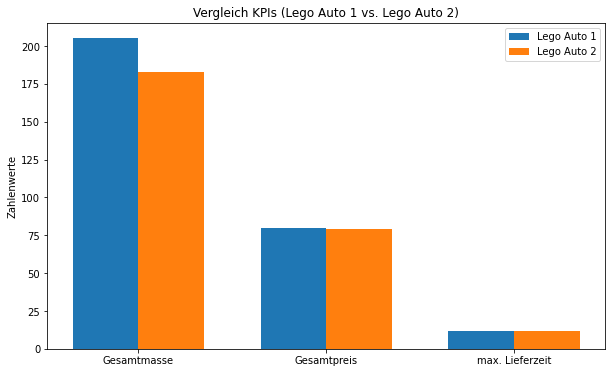

In [15]:
# plot the data, save diagramm as svg-file
#Import der notwendigen Funkftionen
import matplotlib.pyplot as plt
import numpy as np

# Definieren der notwendigen Parameter aus den Datensätzen der Autos
properties = ["Gesamtmasse", "Gesamtpreis", "max. Lieferzeit"]
values_lego_car = [total_mass_one, total_price_one, max_delivery_time_one]
values_lego_car_two = [total_mass_two, total_price_two, max_delivery_time_two]

# Breite der Balken
bar_width = 0.35

# Indizierung
indices = np.arange(len(properties))

# Diagramm erstellen
plt.figure(figsize=(10, 6))

# Legende und ausgeben der entsprechenden Daten
plt.bar(indices - bar_width/2, values_lego_car, bar_width, label='Lego Auto 1')
plt.bar(indices + bar_width/2, values_lego_car_two, bar_width, label='Lego Auto 2')
#Weitere Beschriftungen
plt.ylabel('Zahlenwerte')
plt.title('Vergleich KPIs (Lego Auto 1 vs. Lego Auto 2)')
plt.xticks(indices, properties)
plt.legend()
#abspeichern des Diagramms im Repositorium 
plt.savefig('comparison_plot.svg', format='svg', bbox_inches='tight')
#zeigen des Diagramms
plt.show()

Interpretieren Sie Ihre Ergebnisse. Vergleichen Sie die KPIs Ihrer Autos. Konnten Sie Ihre gewünschte Verbesserung erzielen? Welche Schlüsse ziehen Sie aus den Ergebnissen für die Qualität der beiden
Fahrzeuge?

Es ist deutlich zu erkennen, dass sich das Gesamtgewicht bei dem zweiten Fahrzeug deutlich verringert hat. Mein Versuchziel dadurch auch noch den Preis zu senken, hat ebenfalls funktioniert.

Diskutieren Sie, inwieweit Ihre entwickelten KPIs die im Skript erläuterten FAIR-Prinzipien erfüllen:

Findable: Durch die Namenskonvention und meine hoffentlich intuitive Beschriftung sind meine Daten eindeutig zu finden. 

Accessible: Die Zugänglichkeit der Daten ist meiner Meinung nach ausreichend gegeben. Es ist eine Ausweisung der Metadaten vorhanden und durch die Verwendung der Repositorien ist der Zugang möglich.

Interoperable: Die Formalitäten der Python Sprache und meine Kommentare bieten hoffentlich eine verständliche Art der Wissenspräsentation.

Reusable: Durch das Zusammenspiel der Screenshots der Autos und dem dazugehörigen Code lässt sich der Zusammenhang erkennen und die Daten können weiter genutzt werden. Alle KPIs sind mit Einheiten und Metadaten versehen, was dies erleichtert. 

Jedoch muss ich zugeben, dass in meinem Diagramm die FAIR-Prinzipien nicht ganz durchgesetzt sind. Es fehlen Einheiten und eine genaue Ausweisung der Metadaten. 

## Fazit

Ziehen Sie ein persönliches Fazit. Was haben Sie Neues gelernt?

Ich habe in diesem Versuch eindeutig meine Programmierkenntnisse auffrischen können und vorallem den Umgang mit Git und den Grundlagen der FAIR-Prinzipien erlernen. Es hilft diese Prinzipien nicht nur auswendig zu lernen, sondern Sie auch anzuwenden.